In [1]:
# Data Processing and Cleaning
import numpy as np
import pandas as pd

In [2]:
# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

In [3]:
# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz

In [4]:
# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

In [5]:
#Miscellaneous
from tqdm import tqdm_notebook


In [6]:
import os
import copy
print(os.listdir("C:/Users/Administrator/Downloads/box office project"))

['.ipynb_checkpoints', 'sample_submission.csv', 'test.csv', 'train.csv']


In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [8]:
train.head(3).T

,0,1,2
id,1,2,3
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN
budget,14000000,40000000,3300000
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]"
homepage,NaN,NaN,http://sonyclassics.com/whiplash/
imdb_id,tt2637294,tt0368933,tt2582802
original_language,en,en,en
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ..."
popularity,6.575393,8.248895,64.29999


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [10]:
rf_train = copy.copy(train)
rf_test = copy.copy(test)

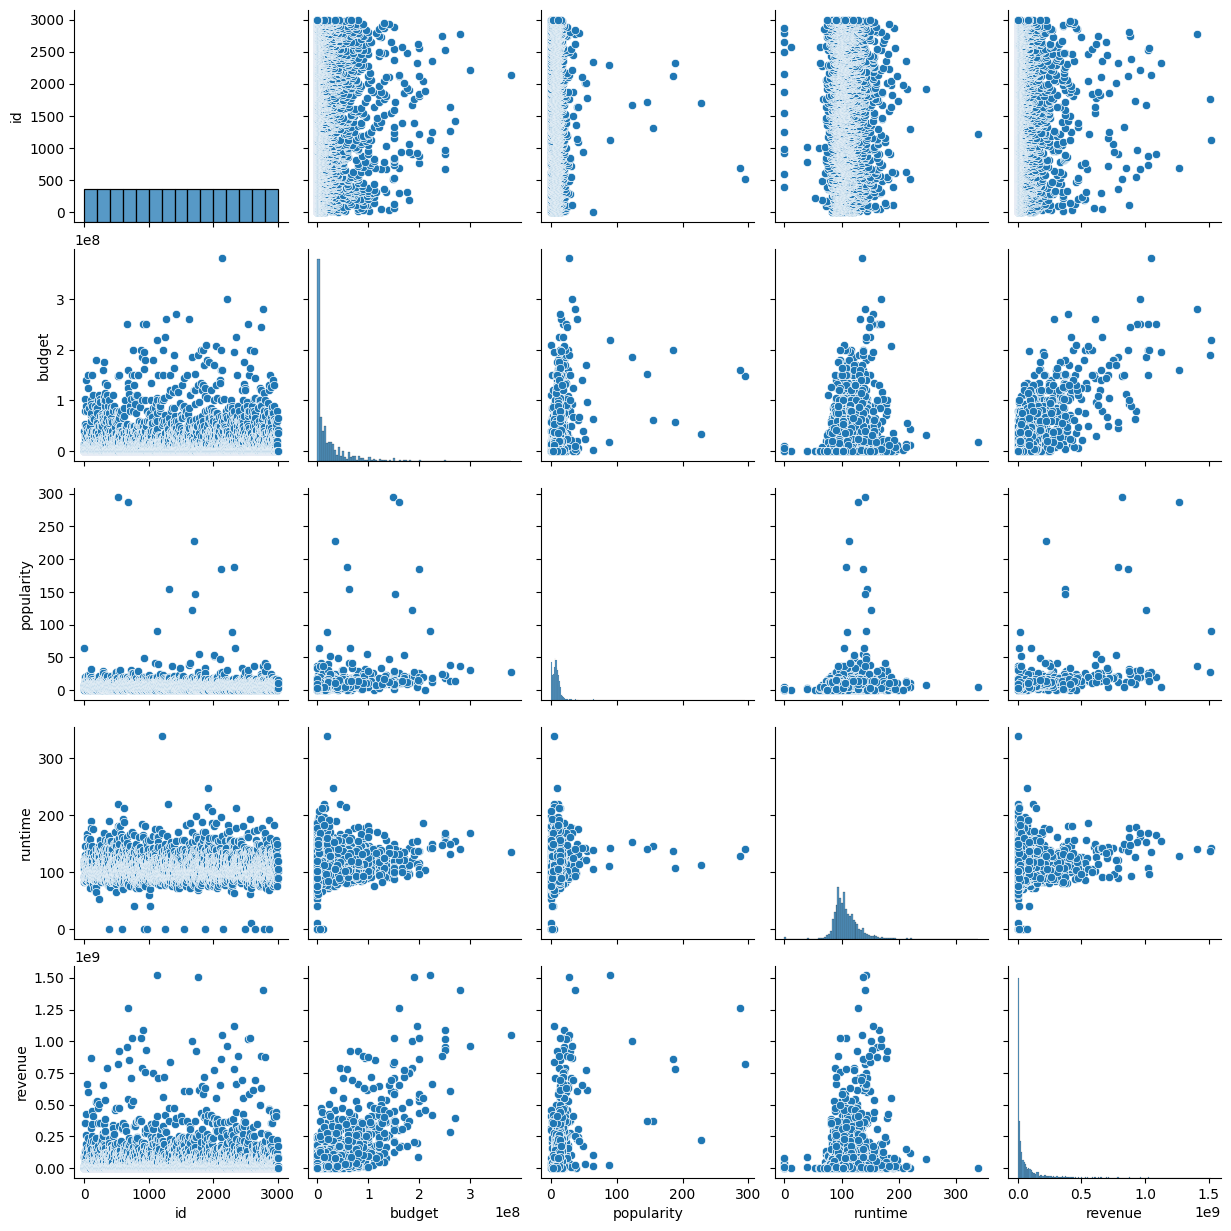

In [11]:
sns.pairplot(rf_train)

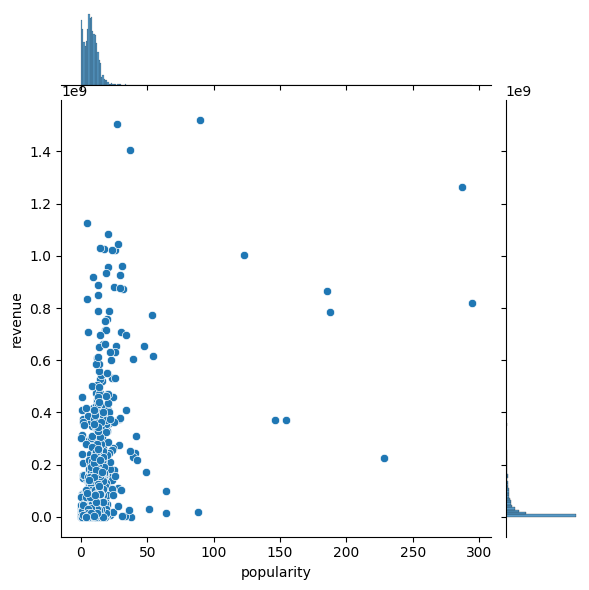

In [12]:
sns.jointplot(x=rf_train["popularity"], y=rf_train["revenue"], kind='scatter')

In [13]:
rf_train['original_language'].value_counts()

original_language
en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       3
no       2
ml       2
pl       2
te       2
fi       2
ur       1
he       1
el       1
ar       1
nb       1
vi       1
mr       1
cs       1
sr       1
bn       1
id       1
Name: count, dtype: int64

In [14]:
rf_train['status'].value_counts()

status
Released    2996
Rumored        4
Name: count, dtype: int64

In [15]:
rf_train['release_date'] = pd.to_datetime(rf_train['release_date'])
rf_train['year'], rf_train['month'] = rf_train['release_date'].dt.year, rf_train['release_date'].dt.month

rf_test['release_date'] = pd.to_datetime(rf_test['release_date'])
rf_test['year'], rf_test['month'] = rf_test['release_date'].dt.year, rf_test['release_date'].dt.month

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13324\158660862.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rf_train['release_date'] = pd.to_datetime(rf_train['release_date'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13324\158660862.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rf_test['release_date'] = pd.to_datetime(rf_test['release_date'])


In [16]:
from sklearn.preprocessing import LabelEncoder
le_language_train = LabelEncoder()
#Train
rf_train['language_encoded'] = le_language_train.fit_transform(rf_train.original_language)


rf_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,year,month,language_encoded
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,7
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,7
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,7
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,13
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,18


In [17]:
rf_train.dtypes

id                                int64
belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
Keywords                         object
cast                             object
crew                             object
revenue                           int64
year                              int32
month                             int32


In [18]:
le_language_test = LabelEncoder()


rf_test['language_encoded'] = le_language_test.fit_transform(rf_test.original_language)


rf_test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,year,month,language_encoded
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",2007.0,7.0,19
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",2058.0,5.0,9
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",1997.0,5.0,9
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",2010.0,9.0,12
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",2005.0,2.0,9


In [19]:
rf_test.dtypes

id                                int64
belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
Keywords                         object
cast                             object
crew                             object
year                            float64
month                           float64
language_encoded                  int32


In [20]:
#rf_train[['id','budget','popularity','runtime','revenue']]
rf_train.drop(['belongs_to_collection','genres','homepage','imdb_id','original_language','original_title',
              'overview','poster_path','production_companies','production_countries','release_date',
              'spoken_languages','status','tagline','title','Keywords','cast','crew'], axis=1, inplace=True)

rf_train.head()

,id,budget,popularity,runtime,revenue,year,month,language_encoded
0,1,14000000,6.575393,93.0,12314651,2015,2,7
1,2,40000000,8.248895,113.0,95149435,2004,8,7
2,3,3300000,64.299990,105.0,13092000,2014,10,7
3,4,1200000,3.174936,122.0,16000000,2012,3,13
4,5,0,1.148070,118.0,3923970,2009,2,18


In [21]:
#rf_train[['id','budget','popularity','runtime','revenue']]
rf_test.drop(['belongs_to_collection','genres','homepage','imdb_id','original_language','original_title',
              'overview','poster_path','production_companies','production_countries','release_date',
              'spoken_languages','status','tagline','title','Keywords','cast','crew'], axis=1, inplace=True)
rf_test.head()

,id,budget,popularity,runtime,year,month,language_encoded
0,3001,0,3.851534,90.0,2007.0,7.0,19
1,3002,88000,3.559789,65.0,2058.0,5.0,9
2,3003,0,8.085194,100.0,1997.0,5.0,9
3,3004,6800000,8.596012,130.0,2010.0,9.0,12
4,3005,2000000,3.217680,92.0,2005.0,2.0,9


In [22]:
#Count NAs
rf_test.isna().sum()

id                  0
budget              0
popularity          0
runtime             4
year                1
month               1
language_encoded    0
dtype: int64

In [23]:
rf_train.isna().sum()

id                  0
budget              0
popularity          0
runtime             2
revenue             0
year                0
month               0
language_encoded    0
dtype: int64

In [24]:
#Lets fill with Mean
mean_runtime=rf_train.iloc[:,3]
mean_runtime.head()

0     93.0
1    113.0
2    105.0
3    122.0
4    118.0
Name: runtime, dtype: float64

In [25]:
mean_runtime.mean()

107.85657104736491

In [26]:
rf_train=rf_train.fillna(mean_runtime.mean())
rf_test=rf_test.fillna(mean_runtime.mean())

In [27]:
rf_train.isna().sum()

id                  0
budget              0
popularity          0
runtime             0
revenue             0
year                0
month               0
language_encoded    0
dtype: int64

In [28]:
# comparing sizes of data frames 
print("Old data frame length:", len(train), "\nNew data frame length:",  
       len(rf_train), "\nNumber of rows with at least 1 NA value: ", 
       (len(train)-len(rf_train))) 

Old data frame length: 3000 
New data frame length: 3000 
Number of rows with at least 1 NA value:  0


In [29]:
# comparing sizes of data frames 
print("Old data frame length:", len(test), "\nNew data frame length:",  
       len(rf_test), "\nNumber of rows with at least 1 NA value: ", 
       (len(test)-len(rf_test))) 

Old data frame length: 4398 
New data frame length: 4398 
Number of rows with at least 1 NA value:  0


In [30]:
rf_train.dtypes

id                    int64
budget                int64
popularity          float64
runtime             float64
revenue               int64
year                  int32
month                 int32
language_encoded      int32
dtype: object

In [31]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = rf_train['revenue']
x_train = rf_train.drop(['revenue'], axis=1).values 
x_test = rf_test.values

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree with max_depth = 6
decision_tree = DecisionTreeRegressor(max_depth = 6)
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [32]:
# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
submission3 = pd.DataFrame({
        "id": rf_test['id'],
        "revenue": y_pred
    })

# Output Submission
submission3.to_csv('submission3.csv', index=False)

In [33]:
#Verify this is the correct row count for submissions.
submission3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       4398 non-null   int64  
 1   revenue  4398 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 68.8 KB


In [36]:
submission3

,id,revenue
0,3001,5.651985e+06
1,3002,5.651985e+06
2,3003,3.245268e+07
3,3004,1.400309e+07
4,3005,5.651985e+06
...,...,...
4393,7394,9.963397e+07
4394,7395,4.281531e+07
4395,7396,4.281531e+07
4396,7397,3.522667e+07
